# Задание 8.1
Найти аналитическое и приближенное решения краевой задачи
$$
\begin{equation*}
    \begin{cases}
    -u'' - u'=  2x^2 - 1, x \in (0, 3)\\
    u(0) = 2, u(3) = 0
    \end{cases}
\end{equation*}  
$$
с заданным шагом h. Решение системы разностных уравнений найти с помощью метода прогонки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Найдем аналитическое решение задачи

Найдем однородное решение $-u'' - u' = 2x^2 - 1 \\$ 
Характеристическое уравнение имеет вид:  $-\lambda^2 - \lambda = 0 => \lambda(\lambda + 1) = 0 => \lambda = -1, \lambda = 0 \newline$
Поэтому $u_o = c_1e^{-x} + c_2 \newline$

Найдем частное решение методом неопределенных коэффициентов.
$\newline u_ч = x(Ax^2 + Bx + C) \newline u'' = 6Ax + 2B, u' = 3Ax^2 + 2Bx + C \newline -(6Ax + 2B) - (3Ax^2 + 2Bx + C) = 2x^2 - 1 => -3Ax^2 - (6A + 2B)x - (2B + C) = 2x^2 - 1 \newline$
Найдем неизвестные коэффициенты
$$
\begin{equation*}
    \begin{cases}
    -3A = 2 \\
    6A + 2B = 0 \\
    2B + C = 1
    \end{cases}
\end{equation*}
$$
$$
\begin{equation*}
    \begin{cases}
    A = -\frac{2}{3} \\
    B = 2 \\
    C = -3
    \end{cases}
\end{equation*}
$$
Следовательно, $u_ч = -\frac{2}{3}x^3 + 2x^2 - 3x \newline$
Таким образом, $u = c_1e^{-x} + c_2 -\frac{2}{3}x^3 + 2x^2 - 3x \newline$
Подставив краевые условия, найдем неизвестные коэффициенты $c_1$ и $c_2.\newline$
$$u = \frac{7}{e^{-3} - 1}e^{-x} + 2 - \frac{7}{e^{-3} - 1} -\frac{2}{3}x^3 + 2x^2 - 3x \newline$$

In [2]:
def TrueFunc(x):
    c = 7 / (np.exp(-3) - 1)
    return c * np.exp(-x) + 2 - c - 2/3 * x**3 + 2 * x**2 - 3 * x

2. Составим разностную схему и выписать коэффициенты матрицы системы уравнений и коэффициенты правой части.

Производную u'' можно аппроксимировать второй разностной производной
$$u''(x) \approx \frac{u(x - h) - 2u(x) + u(x +h)}{h^2}$$

Производную u'
$$u' \approx \frac{u(x+h) - u(x-h)}{2h}$$

В результате заданное дифференциальное уравнение оказалось аппроксимированным его дискретным аналогом - разностным уравнением.

$$-\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - \frac{u_{i+1} - u_{i-1}}{2h} = 2x^2 - 1$$
$$u_{i-1}(h - 2) + 4u_i + (-2 - h)u_{i+1} = 2h^2(2x_i^2 - 1)$$
Добавим краевые условия, $$u_0 = 2, u_{n-1} = 0$$

Таким образом, получили систему линейных алгебраических уравнений с числом неизвестных n. Решим эту систему методом прогонки с коэффициентами: $\\b_0 =1, c_0 = 0, d_0 = u_a \\ a_i = h - 2, b_i = 4, c_i = -h - 2, d_i = 2h^2(2x_i^2 - 1), i = 1..n-2\\a_{n-1} = 0, b_{n-1} = 1, d_{n-1} = u_b $

In [3]:
a, b = 0, 3
u_a, u_b = 2, 0
eps = 0.001

def f(x):
    return 2 * x**2 - 1

In [4]:
def TDMA(A, B):
    """Метод прогонки. Au = B
    
    Param:
    A: numpy.ndarray (n x n)
    B: numpy.ndarray (n)
    
    Returns:
    u: numpy.ndarray (n)
    """
    
    n = A.shape[0]
    u = np.zeros(n)
        
    # прямой ход
    alpha = np.zeros(n)
    betta = np.zeros(n)
    gamma = np.zeros(n)
    
    gamma[0] = A[0][0]
    alpha[0] = -A[0][1] / gamma[0]
    betta[0] = B[0] / gamma[0]

    for i in range(1, n - 1):
        gamma[i] = A[i][i] + A[i][i-1] * alpha[i-1]
        alpha[i] = -A[i][i+1] / gamma[i]
        betta[i] = (B[i] - A[i][i-1] * betta[i-1]) / gamma[i]
        
        
    gamma[n-1] = A[n-1][n-1] + A[n-1][n-2] * alpha[n-2]
    betta[n-1] = (B[n-1] - A[n-1][n-2] * betta[n-2]) / gamma[n-1]
    
    
    # обратный ход
    u[n-1] = betta[n-1]
    for i in range(n-2, -1, -1):
        u[i] = alpha[i] * u[i+1] + betta[i]
    
    return u

3. Найдем решение задачи по разностной схеме с точностью 0.001

In [24]:
A, b = AB_matrix([0, 1, 1, 0], 1/4)
A, b

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-1.        ,  2.00390625, -1.        ,  0.        ,  0.        ],
        [ 0.        , -1.        ,  2.015625  , -1.        ,  0.        ],
        [ 0.        ,  0.        , -1.        ,  2.03515625, -1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]]),
 array([1.        , 0.14969164, 0.13114184, 0.08592202, 0.        ]))

In [22]:
TDMA(A, b)

array([1.        , 0.98677897, 0.93550759, 0.84772689, 0.72609918,
       0.57452234, 0.39825126, 0.20399993, 0.        ])

In [19]:
def AB_matrix(init, h):
    a_0, b, u_a, u_b = init
    
    n = int((b-a) / h) + 1
    h = (b - a) / (n - 1)

    A = np.zeros((n, n))
    A[0][0] = 1
    for i in range(1, n-1):
        
        # CODE: start
        A[i][i-1] = -1
        A[i][i] = 2 + h**2 * (a + i*h)**2
        A[i][i+1] = -1
        # end
        
        
    A[n-1][n-1] = 1    

    B = np.zeros(n)
    B[0] = u_a
    for i in range(1, n-1):
        
        # CODE: start
        B[i] = h**2 * (2*(a + i*h)**2 + np.pi**2/4)*np.cos(np.pi/2*(a+i*h))
        # end
        
    B[n-1] = u_b
    
    return A, B

In [6]:
def DifferenceSchemeSolve(init, h, eps):
    
    a, b, u_a, u_b = init
    n = int((b - a) / h) + 1
    h = (b - a) / (n - 1)
    
    A, B = AB_matrix(init, h)
    u = TDMA(A, B)
    
    
    trueU = TrueFunc(np.array([a + i*h for i in range(n)]))
    # u = Tridiagonal_alg(init, h)
    loss = []
    
    
    while (np.max(abs(trueU - u)) >= eps):
        loss.append(np.max(abs(trueU - u)))
        h /= 2
        # корректируем шаг
        n = int((b - a) / h) + 1
        h = (b - a) / (n - 1)
        
        A, B = AB_matrix(init, h)
       # u = Tridiagonal_alg(init, h)
        u = TDMA(A, B)
        
        trueU2 = np.zeros(n)
        for i in range(n):
            trueU2[i] = trueU[i // 2] if i % 2 == 0 else TrueFunc(a + i * h)    
        
        trueU = trueU2
        
    loss.append(np.max(abs(trueU - u)))
    
    return u, h, loss

In [7]:
u, h, loss = DifferenceSchemeSolve([a, b, u_a, u_b], 0.1, eps)
n = int((b - a) / h) + 1

print('Точность {} достигается при шаге {:.4f}'.format(eps, h))

print('Количество узлов {}'.format(n))

Точность 0.001 достигается при шаге 0.0250
Количество узлов 121


4. Построим на одном чертеже графики приближенного и аналитического решений, и график погрешности.

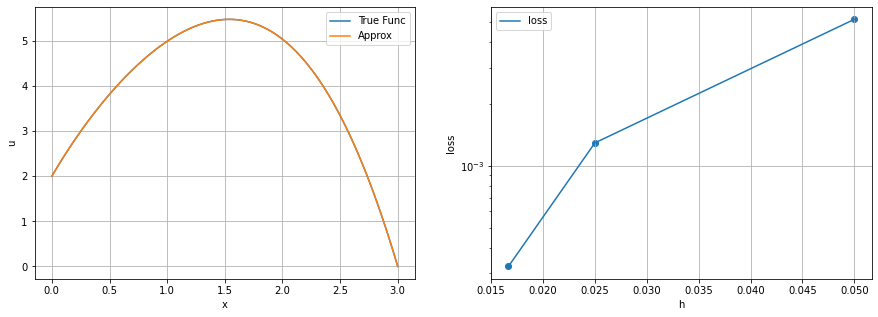

In [8]:
n = int((b - a) / h) + 1
x_data = np.linspace(a, b, n)
h_data = [0.1/(2*i) for i in range(1, len(loss) + 1)]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(x_data, TrueFunc(x_data), label='True Func')
axes[0].plot(x_data, u, label='Approx')
axes[0].set_xlabel('x')
axes[0].set_ylabel('u')

axes[1].plot(h_data, loss, label='loss')
axes[1].scatter(h_data, loss)
axes[1].set_xlabel('h')
axes[1].set_ylabel('loss')
axes[1].set_yscale('log')
for ax in axes:
    ax.grid()
    ax.legend()

# Задание 8.2.
Стержень составляется из трех частей одинаковой длины 1 и с разными коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы указанная точка x0 = 2.8 стержня имела максимальную температуру.

Математическая задача формулируется следующим образом: найти приближенное решение краевой задачи
$$
\begin{equation*}
    \begin{cases}
    -(k(x)u')'=  2x^2 - 1, x \in (0, 3)\\
    u(0) = 1, u(3) = 6
    \end{cases}
\end{equation*}
$$

$$
\begin{equation*}
    \begin{cases}
    7.5 + 0.5x, 0 \leq x \leq 1\\
    13, 1 < x \leq 2\\
    2^{1.5x}, 2 < x \leq 3
    \end{cases}
\end{equation*}
$$
при каждой конфигурации стержня.
Сравнить полученные значения температуры в фиксированной точке в каждом варианте. Выбрать оптимальный результат.

1. Составим подпрограмму, вычисляющую функцию k(x)

In [9]:
def k1(x):
    return 7.5 + 0.5 * x

def k2(x):
    return 13

def k3(x):
    return 2 ** (1.5*x)

def k(x, k_seq):
    t = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= 1:
            t[i] = k_seq[0](x[i])
        elif x[i] <= 2:
            t[i] = k_seq[1](x[i])
        elif x[i] <= 3:
            t[i] = k_seq[2](x[i])
    return t

In [10]:
def k(x, k_seq):
    if x <= 1:
        return k_seq[0](x)
    if x <= 2:
        return k_seq[1](x)
    if x <= 3:
        return k_seq[2](x)

2. Для каждого варианта конфигурации стержня произведем расчет по разностной схеме с шагом: $h = \frac{b - a}{100}$

In [11]:
a, b = 0, 3
u_a, u_b = 1, 6
h = (b - a) / 100
n = int((b - a) / h) + 1
x0 = 2.8

In [12]:
def AB_matrix2(init, h, k_seq):
    
    a, b, u_a, u_b = init
    
    n = int((b-a) / h) + 1
    h = (b - a) / (n - 1)

    A = np.zeros((n, n))
    A[0][0] = 1
    for i in range(1, n-1):
        A[i][i-1] = -k(a + (i - 1/2)*h, k_seq)
        A[i][i] = k(a + (i - 1/2)*h, k_seq) + k(a + (i + 1/2)*h, k_seq)   
        A[i][i+1] = -k(a + (i + 1/2)*h, k_seq)
    A[n-1][n-1] = 1

    B = np.zeros(n)
    B[0] = u_a
    for i in range(1, n-1):
        B[i] = h**2 * (2*(a + i*h)**2 - 1)
    B[n-1] = u_b
    
    return A, B

In [13]:
u1_6 = np.zeros((6, n))
i = 0
for k_seq in ((k1,k2,k3), (k1,k3,k2), (k2,k1,k3), (k2,k3,k1), (k3,k1,k2), (k3,k2,k1)):
    A, B = AB_matrix2([a,b,u_a,u_b], h, k_seq)
    u1_6[i] = TDMA(A, B)
    i += 1

3. Построим на одном чертеже графики приближенного решения для каждой конфигурации стержня.

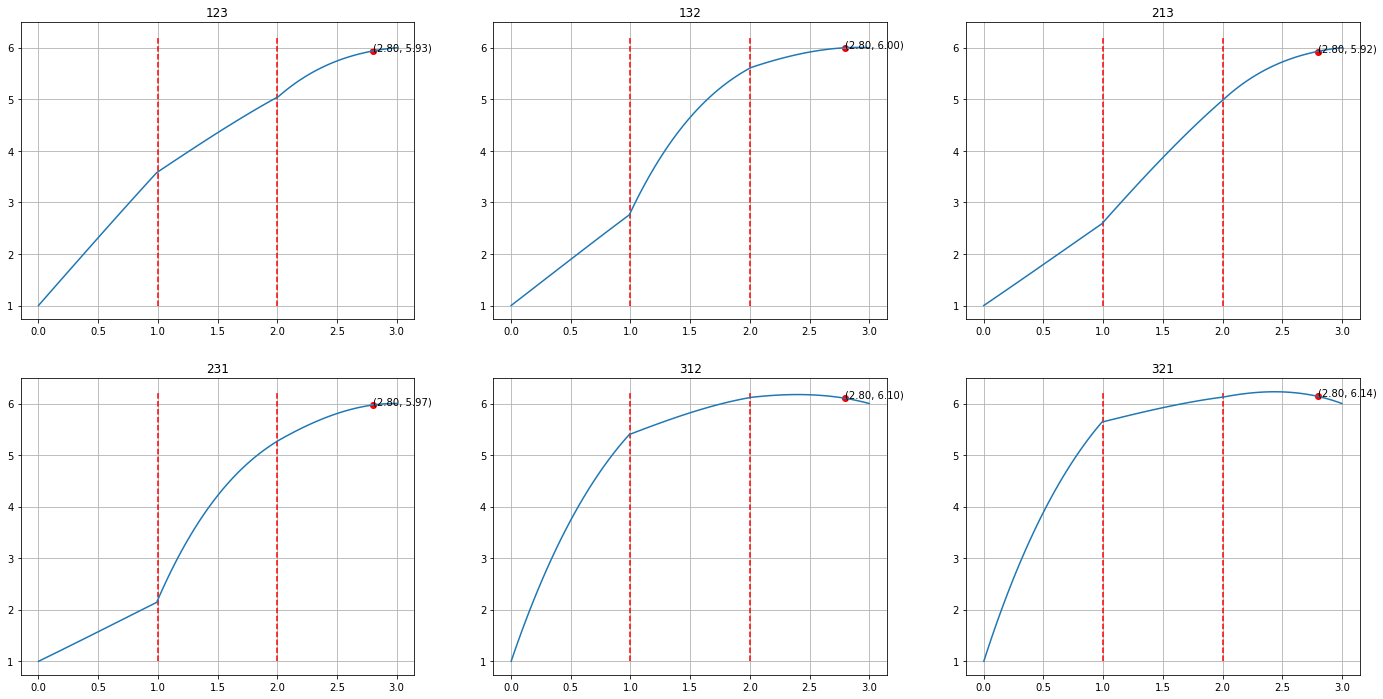

In [14]:
x_data = np.linspace(a, b, n)
x0_ind = int((x0 - a) / h)
x0_val = []


k_seq_title = ['123', '132', '213', '231', '312', '321']
fig, axes = plt.subplots(2, 3, figsize=(24, 12))
for i in range(2):
    for j in range(3):
        axes[i][j].plot(x_data, u1_6[3*i+j])
        
        axes[i][j].set_title(k_seq_title[3*i+j])
        axes[i][j].text(x0, u1_6[3*i+j][x0_ind], "({:.2f}, {:.2f})".format(x0, u1_6[3*i+j][x0_ind]))
        axes[i][j].scatter(x0, u1_6[3*i+j][x0_ind], color='r')
        
        axes[i][j].vlines(1, np.min(u1_6), np.max(u1_6), linestyle='dashed', color='r')
        axes[i][j].vlines(2, np.min(u1_6), np.max(u1_6), linestyle='dashed', color='r')
        
        x0_val.append(u1_6[3*i+j][x0_ind])
        axes[i][j].grid()

4. Сравним полученные решения, выберем оптимальный результат.

In [15]:
u_x0 = []
for i in range(6):
    u_x0.append(u1_6[i][x0_ind])

print('Максимальная температура в точке x0 = {:.2f}: {:.2f}'.format(x0, max(u_x0)))
print('Конфигурация стержня: {}'.format(k_seq_title[np.argmax(u_x0)]))

Максимальная температура в точке x0 = 2.80: 6.14
Конфигурация стержня: 321


Чтобы указанная точка x0 = 2.8 стержня имела максимальную температуру, следует составить части стержня в следующем порядке: {3, 2, 1}